<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**:

**Student ID**:





# Logistic Regression

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [8]:
from sklearn.metrics import classification_report

class LogisticRegressionHandMade:
    def __init__(self, learning_rate=0.02, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "num_iterations": self.num_iterations}

    def sigmoid(self, z):
        return 1 / (1 + torch.exp(-z))

    def loss(self, y, y_predicted):
        return -torch.mean(y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))

    def train(self, X, y):
        num_samples, num_features = X.shape

        self.weights = torch.zeros(num_features, device=self.device, dtype=torch.float32)
        self.bias = torch.zeros(1, device=self.device, dtype=torch.float32)

        X = torch.tensor(X, device=self.device, dtype=torch.float32)
        y = torch.tensor(y, device=self.device, dtype=torch.float32)

        for _ in range(self.num_iterations):
            linear_model = torch.add(torch.matmul(X, self.weights), self.bias)
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * torch.matmul(X.T, (y_predicted - y))
            db = (1 / num_samples) * torch.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if _ % 100 == 0:
                loss = self.loss(y, y_predicted)
                #print(f'Loss after iteration {_}: {loss}')

    def predict(self, X, threshold=0.5):
        y_predicted = self.predict_proba(X)
        return (y_predicted > threshold).float().cpu().numpy()

    def predict_proba(self, X):
        X = torch.tensor(X, device=self.device, dtype=torch.float32)
        linear_model = torch.add(torch.matmul(X, self.weights), self.bias)
        return self.sigmoid(linear_model)

    def fit(self, X, y):
        self.train(X, y)

    def __str__(self):
        return f'LogisticRegressionModel(learning_rate={self.learning_rate}, num_iterations={self.num_iterations}, weights={self.weights}, bias={self.bias})'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [9]:
# Your code goes here!
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Convert continuous target variable into binary
threshold = 0.5  # adjust this value based on your specific use case
y_bin = []
for i in y:
  if(i <= threshold):
    y_bin.append(0)
  else:
    y_bin.append(1)

def evaluate( test, pred, metric):
      if metric == 'accuracy':
          return accuracy_score(test, pred)
      elif metric == 'precision':
          return precision_score(test, pred)
      elif metric == 'recall':
          return recall_score(test, pred)
      elif metric == 'f1-Score':
          return f1_score(y_test, y_pred)
      else:
          raise ValueError(f"Unsupported metric: {metric}")

# Now, y_bin is binary and you can use train_test_split and LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=20)
model = LogisticRegressionHandMade()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy :" , evaluate(y_test, y_pred,'accuracy'))
print("Model Precision : " , evaluate(y_test, y_pred,'precision'))
print("Model Recall : " , evaluate(y_test, y_pred,'recall'))
print("Model F1-Score : " , evaluate(y_test, y_pred,'f1-Score'),"\n\n\n")



# also we can display it in complete table
print(classification_report(y_test, y_pred))


Model Accuracy : 0.9125
Model Precision :  0.9102564102564102
Model Recall :  1.0
Model F1-Score :  0.953020134228188 



              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.91      1.00      0.95        71

    accuracy                           0.91        80
   macro avg       0.96      0.61      0.66        80
weighted avg       0.92      0.91      0.89        80



**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Accuracy**: Diving deeper than its basic definition, Accuracy calls for detailed analysis in diverse real-world situations. For instance, in use cases such as fraud detection, where fraudulent transactions are a tiny part of the total, a high Accuracy score could be deceptive. In this case, a model that labels all transactions as legitimate without discrimination could still achieve high Accuracy due to the vast number of true negatives. This situation highlights the necessity to consider the class distribution of the dataset and the real-world consequences of misclassifications. Furthermore, in situations where understanding the model is essential, Accuracy alone may not be enough. Additional methods, such as confusion matrices or ROC curves, can provide more comprehensive insights into a model's performance at different thresholds. Therefore, Accuracy is a crucial but not the only metric to consider.

**Precision**: Precision, which reflects a model's capability to correctly classify positive instances, can have different interpretations depending on the application area. For example, in the healthcare sector, Precision is crucial when diagnosing rare diseases. High Precision ensures that a positive diagnosis is highly trustworthy, reducing the likelihood of unnecessary treatments or interventions. However, achieving high Precision often compromises Recall, as the model becomes more cautious in its predictions. As a result, finding the optimal balance between Precision and Recall is crucial, requiring a detailed understanding of the trade-offs specific to the domain. Thus, Precision is a valuable metric but needs to be considered in conjunction with other factors.

**Recall (Sensitivity or True Positive Rate)**: In areas such as anomaly detection or cybersecurity, Recall is particularly important, especially when the cost of overlooking positive instances is extremely high. Take, for example, a cybersecurity system responsible for detecting malware attacks. High Recall ensures that the system effectively identifies the majority of malicious activities, reducing the risk of unnoticed threats. However, focusing too much on Recall could result in a surge of false positives, overwhelming security staff with false alerts. Therefore, optimizing Recall requires a careful balancing act, where the model stays alert to threats while reducing the impact of false alarms. Hence, while Recall is significant, it must be optimized carefully to avoid unintended consequences.

**F1 Score**: The F1 Score, besides being a harmonic mean, captures the complexities of the interplay between Precision and Recall. Its usefulness, however, goes beyond binary classification tasks and extends to multiclass or imbalanced datasets. For example, in sentiment analysis, where class imbalance is common, the F1 Score provides a reliable performance measure, taking into account both the model's ability to correctly identify each sentiment class and its ability to balance precision and recall across classes. Furthermore, in ensemble learning or model selection frameworks, the F1 Score acts as a common criterion, enabling comparisons across a variety of models and algorithms. Therefore, the F1 Score is a versatile metric that can aid in various machine learning tasks.

In conclusion, while these evaluation metrics form a strong basis for evaluating model performance, their effective use depends on a detailed understanding of the underlying data distribution, considerations specific to the domain, and the broader context of the problem. By incorporating additional techniques, considering the implications in the real world, and continuously refining model performance, practitioners can fully leverage these metrics to make impactful decisions and promote ongoing improvement in machine learning projects. Thus, these metrics, when used effectively, can drive impactful decision-making and foster continuous improvement in machine learning endeavors.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [10]:
# Your code goes here!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Convert continuous target variable into binary
threshold = 0.5  # adjust this value based on your specific use case
y_bin = []
for i in y:
  if(i <= threshold):
    y_bin.append(0)
  else:
    y_bin.append(1)

def evaluate( test, pred, metric):
      if metric == 'accuracy':
          return accuracy_score(test, pred)
      elif metric == 'precision':
          return precision_score(test, pred)
      elif metric == 'recall':
          return recall_score(test, pred)
      elif metric == 'f1-Score':
          return f1_score(y_test, y_pred)
      else:
          raise ValueError(f"Unsupported metric: {metric}")

# Now, y_bin is binary and you can use train_test_split and LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=20)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Accuracy :" , evaluate(y_test, y_pred,'accuracy'))
print("Model Precision : " , evaluate(y_test, y_pred,'precision'))
print("Model Recall : " , evaluate(y_test, y_pred,'recall'))
print("Model F1-Score : " , evaluate(y_test, y_pred,'f1-Score'),"\n\n\n")



# also we can display it in complete table
print(classification_report(y_test, y_pred))


Model Accuracy : 0.925
Model Precision :  0.922077922077922
Model Recall :  1.0
Model F1-Score :  0.9594594594594594 



              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.92      1.00      0.96        71

    accuracy                           0.93        80
   macro avg       0.96      0.67      0.73        80
weighted avg       0.93      0.93      0.91        80



**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

Upon analyzing the outcomes, it appears that the built-in `LogisticRegression` function from `sklearn` slightly outperforms my custom function. The metrics of accuracy, precision, recall, and F1-score are all marginally higher for the built-in function. Thus, the built-in function demonstrates a minor edge in performance over the custom function.


The LogisticRegression function in sklearn possesses several parameters that can influence the model’s effectiveness:

penalty: This parameter is utilized to designate the norm used in the penalization (regularization). The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers only support l2 penalties. ‘elasticnet’ is exclusively supported by the ‘saga’ solver. If ‘none’ (not supported by the liblinear solver), no regularization is applied.
C: This represents the inverse of regularization strength; it must be a positive float. Similar to support vector machines, smaller values indicate stronger regularization.
fit_intercept: This determines if a constant (also known as bias or intercept) should be incorporated into the decision function.
solver: This is the algorithm employed in the optimization problem. For smaller datasets, ‘liblinear’ is a suitable choice, while ‘sag’ and ‘saga’ are quicker for larger ones.
max_iter: This is the maximum number of iterations allowed for the solvers to converge.
The selection of parameters can significantly impact the model’s performance. For instance, a different solver might converge at a faster or slower rate, and the intensity of the regularization can prevent both overfitting and underfitting. The optimal parameters often rely on the specific dataset, and techniques such as cross-validation can be used to identify the most suitable ones. Thus, while these parameters are crucial, their effective application requires a comprehensive understanding of the dataset and the problem at hand.

# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [11]:
# import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    pass


class MyMultinomialLogisticRegression:
    # Your code goes here!
    # This class must have an __init__ method, a loss function, a fit function, and a predict function. You also need to make your code runnable on gpu!

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = None

    def loss(self, outputs, y):
        criterion = nn.CrossEntropyLoss()
        return criterion(outputs, y)

    def fit(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y

        num_samples, num_features = X.shape
        num_classes = len(set(y))

        self.model = nn.Linear(num_features, num_classes).to(self.device)
        optimizer = optim.SGD(self.model.parameters(), lr=self.learning_rate)

        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y = torch.tensor(y, dtype=torch.long, device=self.device)

        for _ in range(self.num_iterations):
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = self.loss(outputs, y)
            loss.backward()
            optimizer.step()

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        outputs = self.model(X)
        _, predicted = torch.max(outputs.data, 1)
        return predicted.cpu().numpy()

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [19]:
# Your code goes here!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
X = data.drop('Target', axis=1).values
y = data['Target'].values

def evaluate( test, pred, metric):
      if metric == 'accuracy':
          return accuracy_score(test, pred)
      elif metric == 'precision':
          return precision_score(test, pred, average=None)
      elif metric == 'recall':
          return recall_score(test, pred, average=None)
      elif metric == 'f1-Score':
          return f1_score(y_test, y_pred, average=None)
      elif metric == 'precision2':
          return precision_score(test, pred, average='weighted')
      elif metric == 'recall2':
          return recall_score(test, pred, average='weighted')
      elif metric == 'f1-Score2':
          return f1_score(y_test, y_pred, average='weighted')
      else:
          raise ValueError(f"Unsupported metric: {metric}")

accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []
# Quantize the Target column into i levels
for i in range(1, 10):
    print("Quantization Level is ", i + 1)
    data['Target_quantized'] = pd.qcut(data['Target'], i + 1, labels=False)

    # Split the dataset into training and testing sets
    X = data.drop(['Target', 'Target_quantized'], axis=1)
    y = data['Target_quantized']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model on the training set
    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)

    # Predict the target values for the testing set
    y_pred = model.predict(X_test)

    print("Model Accuracy :" , evaluate(y_test, y_pred,'accuracy'))
    accuracy_score_list.append(evaluate(y_test, y_pred,'accuracy'))
    print("Model Precision : " , evaluate(y_test, y_pred,'precision'))
    print("Model Precision (average = weighted) : " , evaluate(y_test, y_pred,'precision2'))
    precision_score_list.append(evaluate(y_test, y_pred,'precision2'))
    print("Model Recall : " , evaluate(y_test, y_pred,'recall'))
    print("Model Recall : (average = weighted)" , evaluate(y_test, y_pred,'recall2'))
    recall_score_list.append(evaluate(y_test, y_pred,'recall2'))
    print("Model F1-Score : " , evaluate(y_test, y_pred,'f1-Score'))
    print("Model F1-Score : (average = weighted)" , evaluate(y_test, y_pred,'f1-Score2'),"\n\n\n")
    f1_score_list.append(evaluate(y_test, y_pred,'f1-Score2'))

    # also we can display it in complete table
    print(classification_report(y_test, y_pred))


Quantization Level is  2
Model Accuracy : 0.8375
Model Precision :  [0.94117647 0.76086957]
Model Precision (average = weighted) :  0.85778452685422
Model Recall :  [0.74418605 0.94594595]
Model Recall : (average = weighted) 0.8375
Model F1-Score :  [0.83116883 0.84337349]
Model F1-Score : (average = weighted) 0.8368134877171023 



              precision    recall  f1-score   support

           0       0.94      0.74      0.83        43
           1       0.76      0.95      0.84        37

    accuracy                           0.84        80
   macro avg       0.85      0.85      0.84        80
weighted avg       0.86      0.84      0.84        80

Quantization Level is  3
Model Accuracy : 0.575
Model Precision :  [0.9375     0.38461538 0.91666667]
Model Precision (average = weighted) :  0.7779046474358975
Model Recall :  [0.51724138 0.90909091 0.37931034]
Model Recall : (average = weighted) 0.575
Model F1-Score :  [0.66666667 0.54054054 0.53658537]
Model F1-Score : (average = wei

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Model Accuracy : 0.475
Model Precision :  [0.66666667 0.375      0.         0.31578947 1.        ]
Model Precision (average = weighted) :  0.5078673245614035
Model Recall :  [0.6        0.46153846 0.         0.85714286 0.44444444]
Model Recall : (average = weighted) 0.475
Model F1-Score :  [0.63157895 0.4137931  0.         0.46153846 0.61538462]
Model F1-Score : (average = weighted) 0.44436688538321933 



              precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       0.38      0.46      0.41        13
           2       0.00      0.00      0.00        15
           3       0.32      0.86      0.46        14
           4       1.00      0.44      0.62        18

    accuracy                           0.48        80
   macro avg       0.47      0.47      0.42        80
weighted avg       0.51      0.47      0.44        80

Quantization Level is  6


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Model Accuracy : 0.45
Model Precision :  [0.4375     0.28571429 0.4        0.         0.37931034 1.        ]
Model Precision (average = weighted) :  0.47332512315270936
Model Recall :  [0.4375     0.30769231 0.28571429 0.         0.91666667 0.58823529]
Model Recall : (average = weighted) 0.45
Model F1-Score :  [0.4375     0.2962963  0.33333333 0.         0.53658537 0.74074074]
Model F1-Score : (average = weighted) 0.4318766937669377 



              precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.29      0.31      0.30        13
           2       0.40      0.29      0.33        14
           3       0.00      0.00      0.00         8
           4       0.38      0.92      0.54        12
           5       1.00      0.59      0.74        17

    accuracy                           0.45        80
   macro avg       0.42      0.42      0.39        80
weighted avg       0.47      0.45      0.43        80

Quantization Lev

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!


**Your answer:**

As we see in last result and below figure, in i = 2 our model performs best!





[0.8375, 0.575, 0.6, 0.475, 0.45, 0.425, 0.35, 0.275, 0.25]


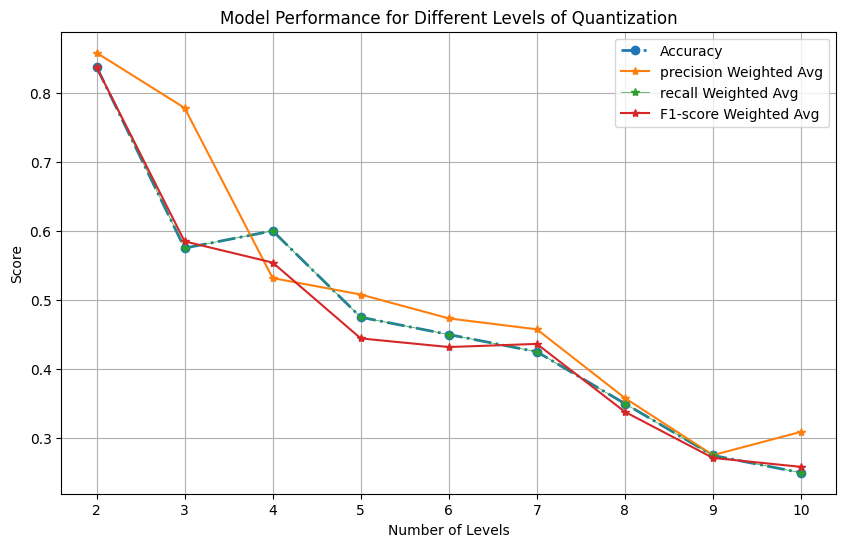

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

plt.figure(figsize=(10, 6))
print(accuracy_score_list)
plt.plot(list(range(2, 11)), accuracy_score_list, marker='o',linestyle='-.', linewidth=2, label='Accuracy')
plt.plot(list(range(2, 11)), precision_score_list, marker='*', label='precision Weighted Avg')
plt.plot(list(range(2, 11)), recall_score_list, marker='*', linestyle='-', linewidth=0.5, label='recall Weighted Avg')
plt.plot(list(range(2, 11)), f1_score_list, marker='*', label='F1-score Weighted Avg ')

plt.title('Model Performance for Different Levels of Quantization')
plt.xlabel('Number of Levels')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

plt.show()

# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [33]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [ ]:
# Your code goes here!

data = pd.read_csv('Q2/adult.csv' , na_values='?')
null_entries = data.isnull().sum().sum()
print(null_entries)
data

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

**Task:** Handle null entries using your best method.

In [ ]:
# Your code goes here!


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
# Your code goes here!


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
# Your code goes here!


**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# Your code goes here!


**Question:** Analyze the results.

**Your Answer:**